In [1]:
import pandas as pd

UDPLag = pd.read_csv('./03-11/UDPLag.csv')
#UDP = pd.read_csv('./03-11/UDP.csv')
LDAP = pd.read_csv('./03-11/LDAP.csv')
#MSSQL = pd.read_csv('./03-11/MSShttps://172.16.178.175:9999/notebooks/CIC.ipynb#QL.csv')
#NetBIOS = pd.read_csv('./03-11/NetBIOS.csv')
#Portmap = pd.read_csv('./03-11/Portmap.csv')
#Syn = pd.read_csv('./03-11/Syn.csv')
#frames=[UDPLag,UDP,LDAP,MSSQL,NetBIOS,Portmap,Syn]

frames=[LDAP,UDPLag]
trainData = pd.concat(frames)

/home/cocse/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
import numpy as np
def cleanData(trainData_):
  colum_=trainData_.columns
  columns=[]

  for col in colum_:
    #col_=col.replace('/', '_')
    #col_=col_.replace(' ', '_')
    columns.append(col.replace('/', '_'))
    #print(col)

  trainData_.columns=columns;

  trainData_.dropna()
  np.nan_to_num(trainData_)
  trainData_.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)
  trainData_.replace(np.nan,0)
  row_mask=trainData_.isnull().any(axis=1)
  col_mask=trainData_.isnull().any(axis=0) 
  rowNumber=0
  dropRowIndexList=[]
  for i in row_mask:
    if i==True:
      print("droping row",rowNumber,i)
      trainData_.drop(trainData_.index[[rowNumber-1,rowNumber+1]],axis=0)
      dropRowIndexList.append(rowNumber)
      #print("Sucess")
    rowNumber=rowNumber+1   
  #trainData_.drop(dropRowIndexList)
  trainData_=trainData_[~trainData_.isin([np.nan, np.inf, -np.inf]).any(1)]

  print("Sucess")
  return trainData_

In [3]:
print(trainData.isnull().sum().sum())
trainData=cleanData(trainData)
print(trainData.isnull().sum().sum())

16
droping row 5290 True
droping row 5292 True
droping row 5327 True
droping row 5330 True
droping row 134955 True
droping row 203151 True
droping row 203161 True
droping row 345227 True
droping row 423313 True
droping row 638155 True
droping row 665354 True
droping row 787748 True
droping row 1899695 True
droping row 2225741 True
droping row 2225893 True
droping row 2359269 True
Sucess
0


In [4]:

X=trainData.drop(" Label",1)
X=X.drop("Flow ID",1)
X=X.drop(" Source IP",1)
X=X.drop(" Destination IP",1)
X=X.drop(" Timestamp",1)
X=X.drop("SimillarHTTP",1)
#X=X.dropna()

Y=trainData[" Label"]
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)


In [5]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_squared_error, r2_score
# fix random seed for reproducibility
np.random.seed(7)


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)


2.2.0


In [6]:


def PlotGraaph(scoresAll,names):
        acc=[]
        prec=[]
        rec=[]
        for i in scoresAll:
            acc.append(i[1]['test_acc'].mean())
            prec.append(i[1]['test_prec_macro'].mean())
            rec.append(i[1]['test_rec_micro'].mean())

        plt.bar(names,acc)
        plt.ylabel('Accuracy');
        plt.xlabel('Classifiers');
        plt.title('FLOOR Acc for different Classifiers on  test data')
        plt.show()

        plt.bar(names,prec)
        plt.ylabel('precision');
        plt.xlabel('Classifiers');
        plt.title('FLOOR precision for different Classifiers on test data')
        plt.show()

        plt.bar(names,rec)
        plt.ylabel('recall');
        plt.xlabel('Classifiers');
        plt.title(' FLOOR recall for different Classifiers on test data')
        plt.show()



scoring = {'acc': 'accuracy','prec_macro': 'precision_macro','rec_micro': 'recall_macro'}



names = ["Nearest Neighbors", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    SVC(gamma='scale', decision_function_shape='ovo'),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()]

scoresAll=[]

In [ ]:
for name, clf in zip(names, classifiers):
        #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        scores=cross_validate(clf, X,Y, scoring=scoring,cv=5, return_train_score=True)
        scoresAll.append((name,scores))

PlotGraaph(scoresAll,names)

/home/cocse/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion matrix, without normalization
[[   464     30    348   2002    793      1]
 [     3 744480    111     53    115      1]
 [     7   2065  72502   2110      9      0]
 [     3     16     33 222625    261      0]
 [     5   2151  18702  20489   3317      0]
 [     3     80    580     47     26      2]]
Normalized confusion matrix
[[1.28e-01 8.25e-03 9.57e-02 5.50e-01 2.18e-01 2.75e-04]
 [4.03e-06 1.00e+00 1.49e-04 7.12e-05 1.54e-04 1.34e-06]
 [9.13e-05 2.69e-02 9.45e-01 2.75e-02 1.17e-04 0.00e+00]
 [1.35e-05 7.18e-05 1.48e-04 9.99e-01 1.17e-03 0.00e+00]
 [1.12e-04 4.82e-02 4.19e-01 4.59e-01 7.43e-02 0.00e+00]
 [4.07e-03 1.08e-01 7.86e-01 6.37e-02 3.52e-02 2.71e-03]]


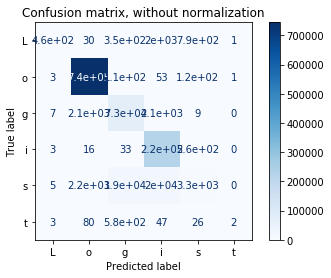

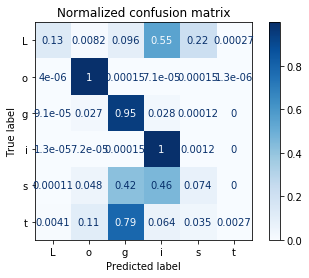

In [9]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(multi_class="auto", solver="liblinear").fit(X_train, y_train)

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels="LogisticRegression",
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()